# Real-time Implementation and Automation with IBKR

--------------------------------------------------------------------------------------------------------------------

_Disclaimer: <br>
The following illustrative examples are for general information and educational purposes only. <br>
It is neither investment advice nor a recommendation to trade, invest or take whatsoever actions.<br>
The below code should only be used in combination with an IBKR Practice/Demo Account and NOT with a Live Trading Account._

------------------------------------------------------------------------------------

# IBKR API - Recap

In [2]:
from ib_insync import *
util.startLoop() 

In [3]:
ib = IB()

In [4]:
# Connect to iteractive broker!
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [5]:
# Check of there is any open position
ib.positions()

[]

In [6]:
contract = Forex('EURUSD')
contract

Forex('EURUSD', exchange='IDEALPRO')

In [7]:
ib.qualifyContracts(contract)

[Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD')]

In [8]:
# subscribe to tick data
data = ib.reqMktData(contract) 

Ticker(contract=Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD'))

In [9]:
data

Ticker(contract=Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD'), time=datetime.datetime(2023, 11, 6, 12, 4, 15, 762765, tzinfo=datetime.timezone.utc), minTick=1e-05, bid=1.07511, bidSize=1000000.0, ask=1.07512, askSize=250000.0, prevBid=1.07512, prevBidSize=2000000.0, prevAsk=1.07513, prevAskSize=3000000.0, high=1.0756, low=1.0722, close=1.073, ticks=[TickData(time=datetime.datetime(2023, 11, 6, 12, 4, 15, 762765, tzinfo=datetime.timezone.utc), tickType=2, price=1.07512, size=250000.0), TickData(time=datetime.datetime(2023, 11, 6, 12, 4, 15, 762765, tzinfo=datetime.timezone.utc), tickType=0, price=1.07511, size=1000000.0)])

In [20]:
# Get the bid price
data.bid

1.07497

In [21]:
# unsubscribe market data
ib.cancelMktData(contract) 

In [22]:
# subsctice the the contract
ib.reqMktData(contract)

Ticker(contract=Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD'), time=datetime.datetime(2023, 11, 6, 12, 5, 42, 103140, tzinfo=datetime.timezone.utc), minTick=1e-05, bid=1.07509, bidSize=1250000.0, ask=1.07511, askSize=3000000.0, prevBid=1.07508, prevBidSize=1000000.0, prevAsk=1.0751, prevAskSize=2500000.0, high=1.0756, low=1.0722, close=1.073, ticks=[TickData(time=datetime.datetime(2023, 11, 6, 12, 5, 42, 103140, tzinfo=datetime.timezone.utc), tickType=0, price=1.07509, size=1250000.0)])

In [23]:
# Get ticker of the given contract
ticker = ib.ticker(contract)
ticker

Ticker(contract=Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD'), time=datetime.datetime(2023, 11, 6, 12, 6, 7, 783637, tzinfo=datetime.timezone.utc), minTick=1e-05, bid=1.07498, bidSize=1000000.0, ask=1.07499, askSize=250000.0, prevBid=1.07499, prevBidSize=2250000.0, prevAsk=1.075, prevAskSize=1250000.0, high=1.0756, low=1.0722, close=1.073, ticks=[TickData(time=datetime.datetime(2023, 11, 6, 12, 6, 7, 783637, tzinfo=datetime.timezone.utc), tickType=3, price=1.07499, size=250000.0)])

In [33]:
# See the bid price
ticker.bid

1.07504

In [34]:
# unsubscribe market data
ib.cancelMktData(contract)

In [35]:
# disconnect!
ib.disconnect()

---

# Streaming Tick Data

In [36]:
from ib_insync import *
import pandas as pd
util.startLoop() 
ib = IB()

In [37]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [38]:
# Chose the contract
contract = Forex('EURUSD')

# subscribe to the contract
ib.reqMktData(contract)

# take the tiker
ticker = ib.ticker(contract)

In [39]:
ticker

Ticker(contract=Forex('EURUSD', exchange='IDEALPRO'), time=datetime.datetime(2023, 11, 6, 12, 11, 50, 180856, tzinfo=datetime.timezone.utc), minTick=1e-05, bid=1.07509, bidSize=3000000.0, ask=1.07511, askSize=2000000.0, prevBid=1.0751, prevBidSize=1000000.0, prevAsk=1.0751, prevAskSize=3000000.0, high=1.0756, low=1.0722, close=1.073, ticks=[TickData(time=datetime.datetime(2023, 11, 6, 12, 11, 50, 180856, tzinfo=datetime.timezone.utc), tickType=1, price=1.07509, size=3000000.0), TickData(time=datetime.datetime(2023, 11, 6, 12, 11, 50, 180856, tzinfo=datetime.timezone.utc), tickType=2, price=1.07511, size=2000000.0)])

In [40]:
# what shall happen after receiving a new tick
# This function catch when we subscribe to a new tiker
def onPendingTickers(tickers): 
    print("time: {} | Bid: {} | Ask:{}".format(ticker.time, ticker.bid, ticker.ask), end = '\r')

In [41]:
# activate onPendingTickers
ib.pendingTickersEvent += onPendingTickers 

# see? its updating automatically each change (of bid/ask/etc)!!!

In [42]:
# de-activate onPendingTickers
ib.pendingTickersEvent -= onPendingTickers 

In [53]:
ticker.bid

1.07497

In [54]:
# Cancel the subscribation to the contract
ib.cancelMktData(contract)

In [55]:
ib.disconnect()

---

# Streaming Tick Data for multiple Symbols

In [56]:
from ib_insync import *
import pandas as pd
from IPython.display import display, clear_output
util.startLoop() 
ib = IB()

In [57]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [58]:
contracts = [Forex(pair) for pair in ('EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'USDCAD', 'AUDUSD')]
ib.qualifyContracts(*contracts)

[Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD'),
 Forex('USDJPY', conId=15016059, exchange='IDEALPRO', localSymbol='USD.JPY', tradingClass='USD.JPY'),
 Forex('GBPUSD', conId=12087797, exchange='IDEALPRO', localSymbol='GBP.USD', tradingClass='GBP.USD'),
 Forex('USDCHF', conId=12087820, exchange='IDEALPRO', localSymbol='USD.CHF', tradingClass='USD.CHF'),
 Forex('USDCAD', conId=15016062, exchange='IDEALPRO', localSymbol='USD.CAD', tradingClass='USD.CAD'),
 Forex('AUDUSD', conId=14433401, exchange='IDEALPRO', localSymbol='AUD.USD', tradingClass='AUD.USD')]

In [59]:
# Subscribe to each contract
for contract in contracts:
    ib.reqMktData(contract)

In [60]:
df = pd.DataFrame(
    index=[c.pair() for c in contracts],
    columns=['bidSize', 'bid', 'ask', 'askSize', 'high', 'low', 'close'])
df

,bidSize,bid,ask,askSize,high,low,close
EURUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USDJPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USDCHF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USDCAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUDUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
def onPendingTickers(tickers): # what shall happen after receiving a new tick
    for t in tickers:
        df.loc[t.contract.pair()] = (
            t.bidSize, t.bid, t.ask, t.askSize, t.high, t.low, t.close)
        clear_output(wait=True)
    display(df) 

In [ ]:
ib.pendingTickersEvent += onPendingTickers # activate onPendingTickers

,bidSize,bid,ask,askSize,high,low,close
EURUSD,3500000.0,1.0749,1.07493,4500000.0,1.0756,1.0722,1.073
USDJPY,3000000.0,149.634,149.635,1000000.0,149.74,149.355,149.38
GBPUSD,3000000.0,1.24225,1.24229,1000000.0,1.24285,1.2365,1.2379
USDCHF,1000000.0,0.89768,0.89772,2000000.0,0.89965,0.8954,0.89915
USDCAD,1000000.0,1.36456,1.36459,1000000.0,1.3667,1.36295,1.3658
AUDUSD,3000000.0,0.65056,0.6506,5000000.0,0.6523,0.65035,0.65135


In [63]:
ib.pendingTickersEvent -= onPendingTickers # de-activate onPendingTickers

In [64]:
for contract in contracts:
    ib.cancelMktData(contract)

In [80]:
ib.disconnect()

## Streaming Real Time Bars (and Historical)

- Trading Stratgies use bar data (uniform time periods with ohlc data), not tick data (non-constant frequency, based on trades and quotes)
- An SMA Crossover 50/200 (days) Strategy works with daily bars.
- Day Trading Strategies are based on e.g. [1min, 5min, 20min, 1h, 3h, 6h] bars
- Bar Size / Frequency itself is a Strategy Parameter (to be optimized)

In [1]:
from ib_insync import *
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
util.startLoop() 

In [2]:
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [3]:
contract = Forex('EURUSD')
contract

Forex('EURUSD', exchange='IDEALPRO')

__durationStr__: Time span of all the bars. Examples:
        __'60 S', '30 D', '13 W', '6 M', '10 Y'__.

__barSizeSetting__: Time period of one bar. Must be one of: <br>
        __'1 secs', '5 secs', '10 secs' 15 secs', '30 secs',
        '1 min', '2 mins', '3 mins', '5 mins', '10 mins', '15 mins',
        '20 mins', '30 mins',
        '1 hour', '2 hours', '3 hours', '4 hours', '8 hours',
        '1 day', '1 week', '1 month'__.

In [14]:
# Get historical data
bars = ib.reqHistoricalData(
        contract, # the instument(s) that intrested 
        endDateTime='',
        durationStr='100 S', # historical period
        barSizeSetting='10 secs', # frequency
        whatToShow='MIDPOINT', 
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)

In [15]:
bars

[BarData(date=datetime.datetime(2023, 11, 6, 13, 22, 10, tzinfo=datetime.timezone.utc), open=1.07408, high=1.07408, low=1.073995, close=1.074055, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 11, 6, 13, 22, 20, tzinfo=datetime.timezone.utc), open=1.074055, high=1.074085, low=1.074005, close=1.07402, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 11, 6, 13, 22, 30, tzinfo=datetime.timezone.utc), open=1.07402, high=1.074085, low=1.07402, close=1.074075, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 11, 6, 13, 22, 40, tzinfo=datetime.timezone.utc), open=1.074075, high=1.07415, low=1.074075, close=1.07415, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 11, 6, 13, 22, 50, tzinfo=datetime.timezone.utc), open=1.07415, high=1.07415, low=1.074085, close=1.07409, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 11, 6, 13, 23, tzinfo=datet

In [16]:
pd.DataFrame(bars)

,date,open,high,low,close,volume,average,barCount
0,2023-11-06 13:22:10+00:00,1.074080,1.074080,1.073995,1.074055,-1.0,-1.0,-1
1,2023-11-06 13:22:20+00:00,1.074055,1.074085,1.074005,1.074020,-1.0,-1.0,-1
2,2023-11-06 13:22:30+00:00,1.074020,1.074085,1.074020,1.074075,-1.0,-1.0,-1
3,2023-11-06 13:22:40+00:00,1.074075,1.074150,1.074075,1.074150,-1.0,-1.0,-1
4,2023-11-06 13:22:50+00:00,1.074150,1.074150,1.074085,1.074090,-1.0,-1.0,-1
5,2023-11-06 13:23:00+00:00,1.074090,1.074090,1.074045,1.074055,-1.0,-1.0,-1
6,2023-11-06 13:23:10+00:00,1.074055,1.074170,1.074050,1.074170,-1.0,-1.0,-1
7,2023-11-06 13:23:20+00:00,1.074170,1.074335,1.074170,1.074325,-1.0,-1.0,-1
8,2023-11-06 13:23:30+00:00,1.074325,1.074390,1.074320,1.074390,-1.0,-1.0,-1
9,2023-11-06 13:23:40+00:00,1.074390,1.074395,1.074360,1.074360,-1.0,-1.0,-1


In [ ]:
# cancel subscription
ib.cancelHistoricalData(bars) 

Error 162, reqId 21: Historical Market Data Service error message:API historical data query cancelled: 21


In [17]:
 # what shall happen after receiving a new bar
def onBarUpdate(bars, hasNewBar): 
    df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]]
    df.set_index("date", inplace = True)
    clear_output(wait=True)
    display(df)

In [23]:
# start stream
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='50 S',
        barSizeSetting='5 secs',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)

In [24]:
bars.updateEvent += onBarUpdate # activate onBarUpdate
# see ? its update wach 5 sec on new data point!

,open,high,low,close
date,,,,
2023-11-06 13:29:01+00:00,1.074055,1.074055,1.074045,1.074045
2023-11-06 13:29:02+00:00,1.074045,1.074045,1.074005,1.074005
2023-11-06 13:29:03+00:00,1.074005,1.074005,1.074000,1.074000
2023-11-06 13:29:04+00:00,1.074000,1.074000,1.073995,1.073995
2023-11-06 13:29:05+00:00,1.073995,1.074025,1.073995,1.074015
2023-11-06 13:29:06+00:00,1.074015,1.074015,1.074015,1.074015
2023-11-06 13:29:07+00:00,1.074015,1.074015,1.074010,1.074010
2023-11-06 13:29:08+00:00,1.074010,1.074050,1.074010,1.074030
2023-11-06 13:29:09+00:00,1.074030,1.074055,1.074030,1.074055


In [25]:
# de-activate onBarUpdate
bars.updateEvent -= onBarUpdate 

In [ ]:
ib.cancelHistoricalData(bars) # cancel subscription

Error 366, reqId 24: No historical data query found for ticker id:24


---

# Application: Creating a live Candle Stick Chart 

In [26]:
# Create the event function (on bar update)
def onBarUpdate(bars, hasNewBar):
    plt.close()
    plot = util.barplot(bars, title = "EURUSD", upColor = "green", downColor = "red")
    clear_output(wait=True)
    display(plot)

In [27]:
# Request the historical data
bars = ib.reqHistoricalData(
        contract, # the instrument
        endDateTime='', 
        durationStr='1000 S', # time span
        barSizeSetting='10 secs', # frequency
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)

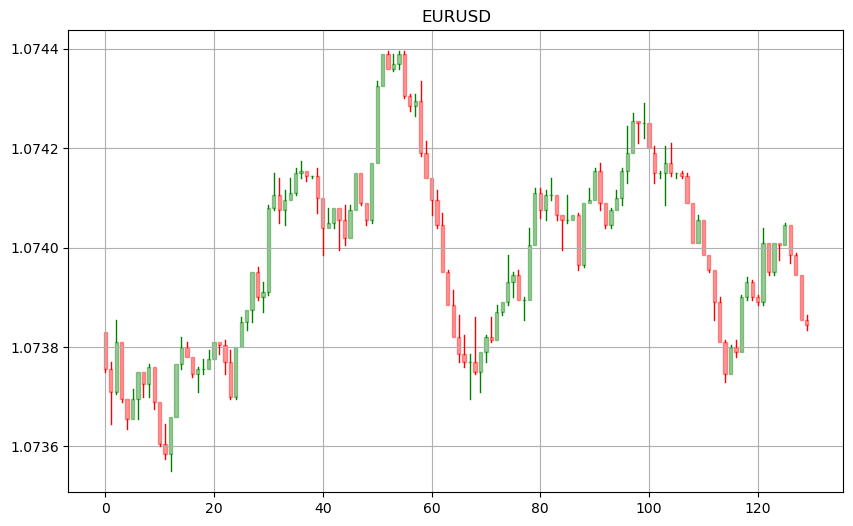

In [28]:
bars.updateEvent += onBarUpdate # activate onBarUpdate

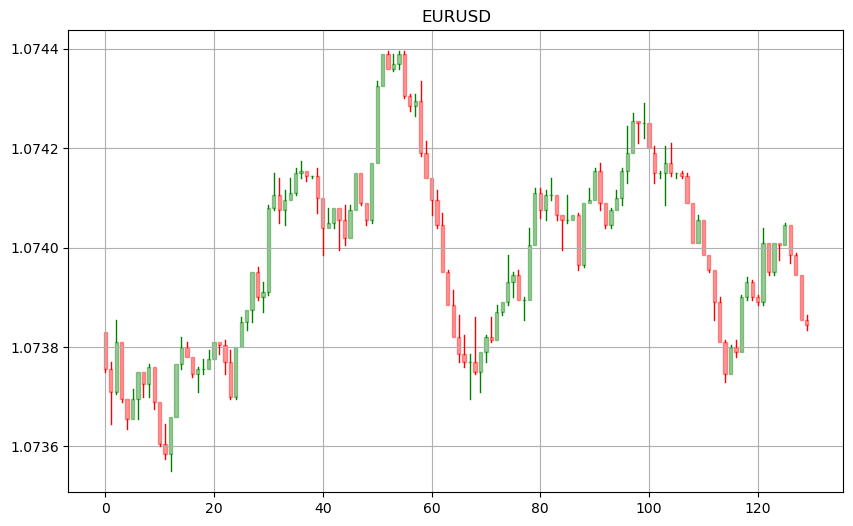

In [29]:
bars.updateEvent -= onBarUpdate # de-activate onBarUpdate

In [ ]:
ib.cancelHistoricalData(bars) # cancel subscription

Error 162, reqId 26: Historical Market Data Service error message:API historical data query cancelled: 26


In [31]:
ib.disconnect()

---

# Preparing the Data for Day Trading

- Problem: most recent bar is (typically) incomplete (until the end of the bar has been reached)
- In Trading: Take actions once a new bar is complete 

In [32]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop() 

In [33]:
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [34]:
contract = Forex('EURUSD')
contract

Forex('EURUSD', exchange='IDEALPRO')

In [35]:
# callback function 
def onBarUpdate(bars, hasNewBar):
    print(dt.datetime.utcnow())

In [36]:
# Request hostorical data..
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting='1 min',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)

In [37]:
# subscribe the function 
bars.updateEvent += onBarUpdate

2023-11-06 13:39:24.586692
2023-11-06 13:39:24.628497
2023-11-06 13:39:44.238351
2023-11-06 13:39:49.581495
2023-11-06 13:39:51.573003
2023-11-06 13:39:54.626746
2023-11-06 13:39:59.151538
2023-11-06 13:39:59.282247
2023-11-06 13:40:04.346232
2023-11-06 13:40:09.215999


In [ ]:
ib.cancelHistoricalData(bars) 

Error 162, reqId 21: Historical Market Data Service error message:API historical data query cancelled: 21


In [39]:
def onBarUpdate(bars, hasNewBar): 
    global df
    # remove current bar (incomplete) 
    df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
    # add the bar
    df.set_index("date", inplace = True)
    clear_output(wait=True)
    display(df)

In [40]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting='1 min',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)
bars.updateEvent += onBarUpdate 

,open,high,low,close
date,,,,
2023-11-05 22:15:00+00:00,1.072600,1.072720,1.072385,1.072475
2023-11-05 22:16:00+00:00,1.072480,1.072545,1.072475,1.072490
2023-11-05 22:17:00+00:00,1.072490,1.072545,1.072390,1.072465
2023-11-05 22:18:00+00:00,1.072465,1.072470,1.072465,1.072470
2023-11-05 22:19:00+00:00,1.072470,1.072475,1.072470,1.072475
...,...,...,...,...
2023-11-06 13:47:00+00:00,1.073745,1.073925,1.073745,1.073895
2023-11-06 13:48:00+00:00,1.073895,1.073915,1.073690,1.073800
2023-11-06 13:49:00+00:00,1.073800,1.073840,1.073735,1.073770


In [ ]:
ib.cancelHistoricalData(bars) 

Error 162, reqId 22: Historical Market Data Service error message:API historical data query cancelled: 22


---

# Improving Code Efficiency

Idea: We need to run major parts of onBarUpdate only if a bar is complete (== new bar has been added)

In [43]:
bars[:5]

[BarData(date=datetime.datetime(2023, 11, 5, 22, 15, tzinfo=datetime.timezone.utc), open=1.0726, high=1.07272, low=1.072385, close=1.072475, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 11, 5, 22, 16, tzinfo=datetime.timezone.utc), open=1.07248, high=1.072545, low=1.072475, close=1.07249, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 11, 5, 22, 17, tzinfo=datetime.timezone.utc), open=1.07249, high=1.072545, low=1.07239, close=1.072465, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 11, 5, 22, 18, tzinfo=datetime.timezone.utc), open=1.072465, high=1.07247, low=1.072465, close=1.07247, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 11, 5, 22, 19, tzinfo=datetime.timezone.utc), open=1.07247, high=1.072475, low=1.07247, close=1.072475, volume=-1.0, average=-1.0, barCount=-1)]

In [44]:
# check if current (incomplete) bar is more recent than the last complete bar
bars[-1].date > bars[-2].date

True

In [45]:
def onBarUpdate(bars, hasNewBar):  
    global df, last_bar
    if bars[-1].date > last_bar: # if bar completed / new bar
        last_bar = bars[-1].date
    
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
        df.set_index("date", inplace = True)
        clear_output(wait=True)
        display(df)

In [46]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting='1 min',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)

# initialize last_bar
last_bar = bars[-1].date 
bars.updateEvent += onBarUpdate

,open,high,low,close
date,,,,
2023-11-05 22:15:00+00:00,1.072600,1.072720,1.072385,1.072475
2023-11-05 22:16:00+00:00,1.072480,1.072545,1.072475,1.072490
2023-11-05 22:17:00+00:00,1.072490,1.072545,1.072390,1.072465
2023-11-05 22:18:00+00:00,1.072465,1.072470,1.072465,1.072470
2023-11-05 22:19:00+00:00,1.072470,1.072475,1.072470,1.072475
...,...,...,...,...
2023-11-06 13:53:00+00:00,1.073575,1.073740,1.073550,1.073740
2023-11-06 13:54:00+00:00,1.073740,1.073995,1.073740,1.073985
2023-11-06 13:55:00+00:00,1.073985,1.073985,1.073600,1.073605


In [ ]:
ib.cancelHistoricalData(bars) 

Error 162, reqId 23: Historical Market Data Service error message:API historical data query cancelled: 23


In [48]:
ib.disconnect()

In [49]:
df

,open,high,low,close
date,,,,
2023-11-05 22:15:00+00:00,1.072600,1.072720,1.072385,1.072475
2023-11-05 22:16:00+00:00,1.072480,1.072545,1.072475,1.072490
2023-11-05 22:17:00+00:00,1.072490,1.072545,1.072390,1.072465
2023-11-05 22:18:00+00:00,1.072465,1.072470,1.072465,1.072470
2023-11-05 22:19:00+00:00,1.072470,1.072475,1.072470,1.072475
...,...,...,...,...
2023-11-06 13:53:00+00:00,1.073575,1.073740,1.073550,1.073740
2023-11-06 13:54:00+00:00,1.073740,1.073995,1.073740,1.073985
2023-11-06 13:55:00+00:00,1.073985,1.073985,1.073600,1.073605


In [50]:
last_bar

datetime.datetime(2023, 11, 6, 13, 58, tzinfo=datetime.timezone.utc)

---

# Define an SMA Day Trading Strategy

In [51]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop() 

In [52]:
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [53]:
contract = Forex('EURUSD')
contract

Forex('EURUSD', exchange='IDEALPRO')

Strategy: SMA 50/200 (minutes) Crossover (needs to be backtested!!!)

In [54]:
sma_s = 50
sma_l = 200

In [55]:
# a callback function that call when the bar update. 

def onBarUpdate(bars, hasNewBar): 
    global df, last_bar
    
    if bars[-1].date > last_bar: # if there is a new candle bar 
        
        last_bar = bars[-1].date
    
        ## Data Processing 
        # set the new bar on the data frame.
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1]
        df.set_index("date", inplace = True)
        
        ####################### Trading Strategy ###########################
        df = df[["close"]].copy()
        df["sma_s"] = df.close.rolling(sma_s).mean()
        df["sma_l"] = df.close.rolling(sma_l).mean()
        df.dropna(inplace = True)
        df["position"] = np.where(df["sma_s"] > df["sma_l"], 1, -1 )
        ####################################################################
        
        ## Action
        # clear & displat again the data frame.
        clear_output(wait=True)
        display(df)
        

In [56]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting='1 min',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)

In [57]:
last_bar = bars[-1].date
bars.updateEvent += onBarUpdate 

,close,sma_s,sma_l,position
date,,,,
2023-11-06 01:34:00+00:00,1.072840,1.072516,1.072666,-1
2023-11-06 01:35:00+00:00,1.072745,1.072518,1.072667,-1
2023-11-06 01:36:00+00:00,1.072680,1.072519,1.072668,-1
2023-11-06 01:37:00+00:00,1.072750,1.072523,1.072669,-1
2023-11-06 01:38:00+00:00,1.072780,1.072525,1.072671,-1
...,...,...,...,...
2023-11-06 13:59:00+00:00,1.073745,1.073872,1.074646,-1
2023-11-06 14:00:00+00:00,1.073855,1.073864,1.074639,-1
2023-11-06 14:01:00+00:00,1.073815,1.073858,1.074633,-1


In [ ]:
ib.cancelHistoricalData(bars)

Error 162, reqId 21: Historical Market Data Service error message:API historical data query cancelled: 21


In [59]:
ib.disconnect()

---

# Trading

__Please run the following code only with your Paper Trading Account!!!__

__Check the Regular Trading Hours!!!__

In [61]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop() 

In [62]:
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [63]:
## strategy parameters

# cross SMA 
sma_s = 50
sma_l = 200

# frequency
freq = "1 min"

# How much units to trad? 
units = 1000 

# for data streaming
contract = Forex('EURUSD') 
ib.qualifyContracts(contract)

# for trading
cfd = CFD("EUR", currency = "USD") 
ib.qualifyContracts(cfd)
conID = cfd.conId

In [69]:
conID

143916318

__barSizeSetting__: Time period of one bar. Must be one of:
        __'1 secs', '5 secs', '10 secs' 15 secs', '30 secs',
        '1 min', '2 mins', '3 mins', '5 mins', '10 mins', '15 mins',
        '20 mins', '30 mins',
        '1 hour', '2 hours', '3 hours', '4 hours', '8 hours',
        '1 day', '1 week', '1 month'__.

In [71]:
# Callback function (on bat update)
def onBarUpdate(bars, hasNewBar):  
    global df, last_bar
    
    if bars[-1].date > last_bar: # if there is a new bar 
        last_bar = bars[-1].date
    
        ## Data Processing 
        # add the new bar to the data frame
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
        df.set_index("date", inplace = True)
        
        ####################### Trading Strategy ###########################
        df = df[["close"]].copy()
        df["sma_s"] = df.close.rolling(sma_s).mean()
        df["sma_l"] = df.close.rolling(sma_l).mean()
        df.dropna(inplace = True)
        df["position"] = np.where(df["sma_s"] > df["sma_l"], 1, -1 )
        ####################################################################
        
        ## Trading 
        # target = how many buy/sell?
        # e.g.,  1 * 1000 = buy , -1 * 1000 = sell 
        target = df["position"][-1] * units
        # execute the trade
        execute_trade(target = target)
        
        # Display
        clear_output(wait=True)
        display(df)
    else:
        pass


# Function for execute trade! 
def execute_trade(target):
    global current_pos
    
    ## 1. get current Position of this instrument!
    try:
        current_pos = [pos.position for pos in ib.positions() if pos.contract.conId == conID][0]
    except: # if we dont have position
        current_pos = 0 
         
    ## 2. identify required trades
    # target -> the units that we want to trade (e.g: 1000 or -1000)
    # current_pos -> the units from the current position (is we already in trade)
    # we substruct the current position from the target position
   
    # Note**: if you dont understand what going on, run in your head 
    #         a simulation that the algorithem buy 1000 units, then sell
    #         1000 units, and then buy again. run it in your haed. it
    #         will make sance, i promiss.   
    trades = target - current_pos
        
    ## 3. trade execution
    # is the trades is positive, we should buy the contracts
    if trades > 0:
        side = "BUY"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)  

    # is the trades is negative, we should sell the contracts    
    elif trades < 0:
        side = "SELL"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)
    else:
        pass

if you didnt understend about `2. identify required trades`, let's run the simulation:

1. we want to buy 1000 units.
2. current_position = 0 (we dont have a position). so let'e take a long position:
3. trades = units - current_position => 1000 - 0 = 1000
4. 1000 >. 0, so we take a long position. 
5. now we want to take a short position, we sell 1000
6. current position = 1000 (we trade 1000  units in long position)
7. trades = units - current_position = -1000 - 1000 = -2000
8. -2000 < 0, so we take a sell position
9. current position = -1000 (becase we had 1000 - 2000 = -1000)
10. now we want to take a long position of 1000 units.
11. current position = -1000 (we've taken a short position!)
12. trades = units - current_position = 1000 - (-1000) = 2000
13. trades(2000) > 0, so we take long position.
14. we'va -1000 from the prevuis tred (the short), so:
15. we buy 2000, but we had -1000 in short, so we now in a long position of 1000

Did you understood?

In [72]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D', # must be sufficiently long!!! (200 * 1 min)
        barSizeSetting=freq,
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)

last_bar = bars[-1].date

bars.updateEvent += onBarUpdate

,close,sma_s,sma_l,position
date,,,,
2023-11-06 01:34:00+00:00,1.072840,1.072516,1.072666,-1
2023-11-06 01:35:00+00:00,1.072745,1.072518,1.072667,-1
2023-11-06 01:36:00+00:00,1.072680,1.072519,1.072668,-1
2023-11-06 01:37:00+00:00,1.072750,1.072523,1.072669,-1
2023-11-06 01:38:00+00:00,1.072780,1.072525,1.072671,-1
...,...,...,...,...
2023-11-06 14:33:00+00:00,1.074315,1.073902,1.074466,-1
2023-11-06 14:34:00+00:00,1.074195,1.073914,1.074463,-1
2023-11-06 14:35:00+00:00,1.074115,1.073923,1.074460,-1


In [ ]:
ib.cancelHistoricalData(bars)

Error 162, reqId 23: Historical Market Data Service error message:API historical data query cancelled: 23


In [79]:
df

,close,sma_s,sma_l,position
date,,,,
2023-11-06 01:34:00+00:00,1.072840,1.072516,1.072666,-1
2023-11-06 01:35:00+00:00,1.072745,1.072518,1.072667,-1
2023-11-06 01:36:00+00:00,1.072680,1.072519,1.072668,-1
2023-11-06 01:37:00+00:00,1.072750,1.072523,1.072669,-1
2023-11-06 01:38:00+00:00,1.072780,1.072525,1.072671,-1
...,...,...,...,...
2023-11-06 15:08:00+00:00,1.073600,1.074072,1.074323,-1
2023-11-06 15:09:00+00:00,1.073420,1.074062,1.074313,-1
2023-11-06 15:10:00+00:00,1.073145,1.074050,1.074302,-1


In [80]:
ib.disconnect()

---

# Trade Reporting
- We can pull trade information 

In [92]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop()

In [93]:
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [94]:
# List of all fills from this session.
ib.fills()

[Fill(contract=CFD(conId=143916318, symbol='EUR', right='?', exchange='SMART', currency='USD', localSymbol='EUR.USD', tradingClass='EUR.USD'), execution=Execution(execId='000132a9.65487408.01.01', time=datetime.datetime(2023, 11, 6, 14, 35, 1, tzinfo=datetime.timezone.utc), acctNumber='DU8048713', exchange='SMART', side='SLD', shares=1000.0, price=1.07415, permId=150415978, clientId=1, orderId=24, liquidation=0, cumQty=1000.0, avgPrice=1.07415, orderRef='', evRule='', evMultiplier=0.0, modelCode='', lastLiquidity=2), commissionReport=CommissionReport(execId='000132a9.65487408.01.01', commission=2.0, currency='USD', realizedPNL=0.0, yield_=0.0, yieldRedemptionDate=0), time=datetime.datetime(2023, 11, 6, 14, 35, 1, tzinfo=datetime.timezone.utc)),
 Fill(contract=CFD(conId=143916318, symbol='EUR', right='?', exchange='SMART', currency='USD', localSymbol='EUR.USD', tradingClass='EUR.USD'), execution=Execution(execId='000132a9.654883be.01.01', time=datetime.datetime(2023, 11, 6, 15, 28, tzin

In [95]:
# show that in data frame 
util.df([fs.execution for fs in ib.fills()])[["execId", "time", "side", "cumQty", "avgPrice"]].set_index("execId")

# This is all the fills that we made.

,time,side,cumQty,avgPrice
execId,,,,
000132a9.65487408.01.01,2023-11-06 14:35:01+00:00,SLD,1000.0,1.07415
000132a9.654883be.01.01,2023-11-06 15:28:00+00:00,BOT,1000.0,1.07330
000132a9.654883bf.01.01,2023-11-06 15:28:00+00:00,BOT,2000.0,1.07330
000132a9.654884a0.01.01,2023-11-06 15:32:02+00:00,SLD,1000.0,1.07325
000132a9.654884a1.01.01,2023-11-06 15:32:02+00:00,SLD,2000.0,1.07325
000132a9.65488530.01.01,2023-11-06 15:38:00+00:00,BOT,1000.0,1.07320
000132a9.65488531.01.01,2023-11-06 15:38:00+00:00,BOT,2000.0,1.07320


In [96]:
util.df([fs.commissionReport for fs in ib.fills()])[["execId", "realizedPNL"]].set_index("execId")

,realizedPNL
execId,
000132a9.65487408.01.01,0.00
000132a9.654883be.01.01,-3.15
000132a9.654883bf.01.01,0.00
000132a9.654884a0.01.01,-2.05
000132a9.654884a1.01.01,0.00
000132a9.65488530.01.01,-1.95
000132a9.65488531.01.01,0.00


In [97]:
# strategy parameters
sma_s = 2
sma_l = 5
freq = "1 min"
units = 1000
contract = Forex('EURUSD') 
ib.qualifyContracts(contract)
cfd = CFD("EUR", currency = "USD")
ib.qualifyContracts(cfd)
conID = cfd.conId

In [98]:
def onBarUpdate(bars, hasNewBar):  
    global df, last_bar
    
    if bars[-1].date > last_bar: 
        last_bar = bars[-1].date
    
        # Data Processing
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
        df.set_index("date", inplace = True)
        
        ####################### Trading Strategy ###########################
        df = df[["close"]].copy()
        df["sma_s"] = df.close.rolling(sma_s).mean()
        df["sma_l"] = df.close.rolling(sma_l).mean()
        df.dropna(inplace = True)
        df["position"] = np.where(df["sma_s"] > df["sma_l"], 1, -1 )
        ####################################################################
        
        # Trading
        target = df["position"][-1] * units
        execute_trade(target = target)
        
        # Display
        clear_output(wait=True)
        display(df)
    else:
        try:
            trade_reporting()
        except:
            pass

def execute_trade(target):
    global current_pos
    
    # 1. get current Position
    try:
        current_pos = [pos.position for pos in ib.positions() if pos.contract.conId == conID][0]
    except:
        current_pos = 0
         
    # 2. identify required trades
    trades = target - current_pos
        
    # 3. trade execution
    if trades > 0:
        side = "BUY"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)  
    elif trades < 0:
        side = "SELL"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)
    else:
        pass

# Function for recive information on the repost
def trade_reporting():
    global report
    
    # get information on the execution
    fill_df = util.df([fs.execution for fs in ib.fills()])[["execId", "time", "side", "cumQty", "avgPrice"]].set_index("execId")
    # get commision report (realizedPNL -> profit/loss)
    profit_df = util.df([fs.commissionReport for fs in ib.fills()])[["execId", "realizedPNL"]].set_index("execId")
    
    # concatinate between `fill_df` and `profit_df` data frames
    report = pd.concat([fill_df, profit_df], axis = 1).set_index("time").loc[session_start:]
    # group by time! 
    report = report.groupby("time").agg({"side":"first", "cumQty":"max", "avgPrice":"mean", "realizedPNL":"sum"})
    # add a new column of the cummelative sum 
    report["cumPNL"] = report.realizedPNL.cumsum()
        
    clear_output(wait=True)
    display(df, report)

In [ ]:
session_start = pd.to_datetime(dt.datetime.utcnow()).tz_localize("utc")
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting=freq,
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)

last_bar = bars[-1].date
bars.updateEvent += onBarUpdate

,close,sma_s,sma_l,position
date,,,,
2023-11-05 22:15:20+00:00,1.072490,1.072490,1.072478,1
2023-11-05 22:15:25+00:00,1.072490,1.072490,1.072480,1
2023-11-05 22:15:30+00:00,1.072490,1.072490,1.072490,-1
2023-11-05 22:15:35+00:00,1.072490,1.072490,1.072490,-1
2023-11-05 22:15:40+00:00,1.072490,1.072490,1.072490,-1
...,...,...,...,...
2023-11-06 15:42:05+00:00,1.073715,1.073717,1.073735,-1
2023-11-06 15:42:10+00:00,1.073745,1.073730,1.073741,-1
2023-11-06 15:42:15+00:00,1.073740,1.073742,1.073737,1


In [ ]:
ib.cancelHistoricalData(bars) 

Error 162, reqId 37: Historical Market Data Service error message:API historical data query cancelled: 37


In [109]:
ib.disconnect()

---

# Stop the Trading Session

Potential Triggers:
- stop at a certain time (e.g. 21:59 UTC time)
- stop once a certain profit/loss limit has been reached
- etc.

Required Actions:
- Stop Stream/Session
- Close Open Position (go neutral)

In [1]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop()

In [2]:
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [13]:
# strategy parameters
sma_s = 2
sma_l = 5
freq = "1 min"
units = 1000
end_time = dt.time(15, 56, 0) # stop condition 15:54:00
contract = Forex('EURUSD') 
ib.qualifyContracts(contract)
cfd = CFD("EUR", currency = "USD")
ib.qualifyContracts(cfd)
conID = cfd.conId

In [14]:
dt.datetime.utcnow().time()

datetime.time(15, 55, 35, 50635)

In [15]:
dt.datetime.utcnow().time() >= end_time

False

In [16]:
def onBarUpdate(bars, hasNewBar):  
    global df, last_bar
    
    if bars[-1].date > last_bar: 
        last_bar = bars[-1].date
    
        # Data Processing
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
        df.set_index("date", inplace = True)
        
        ####################### Trading Strategy ###########################
        df = df[["close"]].copy()
        df["sma_s"] = df.close.rolling(sma_s).mean()
        df["sma_l"] = df.close.rolling(sma_l).mean()
        df.dropna(inplace = True)
        df["position"] = np.where(df["sma_s"] > df["sma_l"], 1, -1 )
        ####################################################################
        
        # Trading
        target = df["position"][-1] * units
        execute_trade(target = target)
        
        # Display
        clear_output(wait=True)
        display(df)
    else:
        try:
            trade_reporting()
        except:
            pass

def execute_trade(target):
    global current_pos
    
    # 1. get current Position
    try:
        current_pos = [pos.position for pos in ib.positions() if pos.contract.conId == conID][0]
    except:
        current_pos = 0
         
    # 2. identify required trades
    trades = target - current_pos
        
    # 3. trade execution
    if trades > 0:
        side = "BUY"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)  
    elif trades < 0:
        side = "SELL"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)
    else:
        pass

def trade_reporting():
    global report
    
    fill_df = util.df([fs.execution for fs in ib.fills()])[["execId", "time", "side", "cumQty", "avgPrice"]].set_index("execId")
    profit_df = util.df([fs.commissionReport for fs in ib.fills()])[["execId", "realizedPNL"]].set_index("execId")
    report = pd.concat([fill_df, profit_df], axis = 1).set_index("time").loc[session_start:]
    report = report.groupby("time").agg({"side":"first", "cumQty":"max", "avgPrice":"mean", "realizedPNL":"sum"})
    report["cumPNL"] = report.realizedPNL.cumsum()
        
    clear_output(wait=True)
    display(df, report)
  

In [17]:
# start trading session
session_start = pd.to_datetime(dt.datetime.utcnow()).tz_localize("utc")
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting=freq,
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)
last_bar = bars[-1].date
bars.updateEvent += onBarUpdate

## stop trading session
# if the time pass the time limit that we defined, its stop the session. 
while True:
    ib.sleep(5) # check every 5 seconds
    if dt.datetime.utcnow().time() >= end_time: # if stop conditions has been met
        execute_trade(target = 0) # close open position 
        ib.cancelHistoricalData(bars) # stop stream
        ib.sleep(10)
        try:
            trade_reporting() # final reporting
        except:
            pass
        print("Session Stopped.")
        ib.disconnect()
        break
    else:
        pass

,close,sma_s,sma_l,position
date,,,,
2023-11-05 22:19:00+00:00,1.072475,1.072472,1.072475,-1
2023-11-05 22:20:00+00:00,1.072460,1.072468,1.072472,-1
2023-11-05 22:21:00+00:00,1.072485,1.072472,1.072471,1
2023-11-05 22:22:00+00:00,1.072505,1.072495,1.072479,1
2023-11-05 22:23:00+00:00,1.072505,1.072505,1.072486,1
...,...,...,...,...
2023-11-06 15:51:00+00:00,1.074295,1.074183,1.074023,1
2023-11-06 15:52:00+00:00,1.074270,1.074283,1.074082,1
2023-11-06 15:53:00+00:00,1.074270,1.074270,1.074152,1


,side,cumQty,avgPrice,realizedPNL,cumPNL
time,,,,,
2023-11-06 15:56:00+00:00,SLD,2000.0,1.07415,-1.60,-1.60
2023-11-06 15:56:02+00:00,BOT,1000.0,1.07420,-2.05,-3.65


Session Stopped.


---

# **Trading other Strategies**

## __Strategy 1__: Simple Contrarian Strategy (1min / window = 1)

In [ ]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop()

In [ ]:
ib = IB()
ib.connect()

In [ ]:
# strategy parameters
freq = "1 min"
window = 1
units = 1000
end_time = dt.time(21, 59, 0) # stop condition
contract = Forex('EURUSD') 
ib.qualifyContracts(contract)
cfd = CFD("EUR", currency = "USD")
ib.qualifyContracts(cfd)
conID = cfd.conId

In [ ]:
def onBarUpdate(bars, hasNewBar):  
    global df, last_bar
    
    if bars[-1].date > last_bar: 
        last_bar = bars[-1].date
    
        # Data Processing
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
        df.set_index("date", inplace = True)
        
        ####################### Trading Strategy ###########################
        df = df[["close"]].copy()
        df["returns"] = np.log(df["close"] / df["close"].shift())
        df["position"] = -np.sign(df.returns.rolling(window).mean())
        ####################################################################
        
        # Trading
        target = df["position"][-1] * units
        execute_trade(target = target)
        
        # Display
        clear_output(wait=True)
        display(df)
    else:
        try:
            trade_reporting()
        except:
            pass

def execute_trade(target):
    global current_pos
    
    # 1. get current Position
    try:
        current_pos = [pos.position for pos in ib.positions() if pos.contract.conId == conID][0]
    except:
        current_pos = 0
         
    # 2. identify required trades
    trades = target - current_pos
        
    # 3. trade execution
    if trades > 0:
        side = "BUY"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)  
    elif trades < 0:
        side = "SELL"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)
    else:
        pass

def trade_reporting():
    global report
    
    fill_df = util.df([fs.execution for fs in ib.fills()])[["execId", "time", "side", "cumQty", "avgPrice"]].set_index("execId")
    profit_df = util.df([fs.commissionReport for fs in ib.fills()])[["execId", "realizedPNL"]].set_index("execId")
    report = pd.concat([fill_df, profit_df], axis = 1).set_index("time").loc[session_start:]
    report = report.groupby("time").agg({"side":"first", "cumQty":"max", "avgPrice":"mean", "realizedPNL":"sum"})
    report["cumPNL"] = report.realizedPNL.cumsum()
        
    clear_output(wait=True)
    display(df, report)
  

In [ ]:
# start trading session
session_start = pd.to_datetime(dt.datetime.utcnow()).tz_localize("utc")
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting=freq,
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)
last_bar = bars[-1].date
bars.updateEvent += onBarUpdate

# stop trading session
while True:
    ib.sleep(5) # check every 5 seconds
    if dt.datetime.utcnow().time() >= end_time: # if stop conditions has been met
        execute_trade(target = 0) # close open position 
        ib.cancelHistoricalData(bars) # stop stream
        ib.sleep(10)
        try:
            trade_reporting() # final reporting
        except:
            pass
        print("Session Stopped.")
        ib.disconnect()
        break
    else:
        pass

---

## __Strategy 2__: Bollinger Bands SMA 20 (minutes) / 1 Standard Deviation

In [ ]:
from ib_insync import * 
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display, clear_output
util.startLoop()

In [ ]:
ib = IB()
ib.connect()

In [ ]:
# strategy parameters
freq = "1 min"
sma = 20
dev = 1
units = 1000
end_time = dt.time(13, 35, 0) # stop condition
contract = Forex('EURUSD') 
ib.qualifyContracts(contract)
cfd = CFD("EUR", currency = "USD")
ib.qualifyContracts(cfd)
conID = cfd.conId

In [ ]:
def onBarUpdate(bars, hasNewBar):  
    global df, last_bar
    
    if bars[-1].date > last_bar: 
        last_bar = bars[-1].date
    
        # Data Processing
        df = pd.DataFrame(bars)[["date", "open", "high", "low", "close"]].iloc[:-1] 
        df.set_index("date", inplace = True)
        
        ####################### Trading Strategy ###########################
        df = df[["close"]].copy()
        df["SMA"] = df["close"].rolling(sma).mean()
        df["Lower"] = df["SMA"] - df["close"].rolling(sma).std() * dev
        df["Upper"] = df["SMA"] + df["close"].rolling(sma).std() * dev
        df["distance"] = df["close"] - df.SMA
        df["position"] = np.where(df["close"] < df.Lower, 1, np.nan)
        df["position"] = np.where(df["close"] > df.Upper, -1, df["position"])
        df["position"] = np.where(df.distance * df.distance.shift(1) < 0, 0, df["position"])
        df["position"] = df.position.ffill().fillna(0)
        ####################################################################
        
        # Trading
        target = df["position"][-1] * units
        execute_trade(target = target)
        
        # Display
        clear_output(wait=True)
        display(df)
    else:
        try:
            trade_reporting()
        except:
            pass

def execute_trade(target):
    global current_pos
    
    # 1. get current Position
    try:
        current_pos = [pos.position for pos in ib.positions() if pos.contract.conId == conID][0]
    except:
        current_pos = 0
         
    # 2. identify required trades
    trades = target - current_pos
        
    # 3. trade execution
    if trades > 0:
        side = "BUY"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)  
    elif trades < 0:
        side = "SELL"
        order = MarketOrder(side, abs(trades))
        trade = ib.placeOrder(cfd, order)
    else:
        pass

def trade_reporting():
    global report
    
    fill_df = util.df([fs.execution for fs in ib.fills()])[["execId", "time", "side", "cumQty", "avgPrice"]].set_index("execId")
    profit_df = util.df([fs.commissionReport for fs in ib.fills()])[["execId", "realizedPNL"]].set_index("execId")
    report = pd.concat([fill_df, profit_df], axis = 1).set_index("time").loc[session_start:]
    report = report.groupby("time").agg({"side":"first", "cumQty":"max", "avgPrice":"mean", "realizedPNL":"sum"})
    report["cumPNL"] = report.realizedPNL.cumsum()
        
    clear_output(wait=True)
    display(df, report)
  

In [ ]:
# start trading session
session_start = pd.to_datetime(dt.datetime.utcnow()).tz_localize("utc")
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting=freq,
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=2,
        keepUpToDate=True)
last_bar = bars[-1].date
bars.updateEvent += onBarUpdate

# stop trading session
while True:
    ib.sleep(5) # check every 5 seconds
    if dt.datetime.utcnow().time() >= end_time: # if stop conditions has been met
        execute_trade(target = 0) # close open position 
        ib.cancelHistoricalData(bars) # stop stream
        ib.sleep(10)
        try:
            trade_reporting() # final reporting
        except:
            pass
        print("Session Stopped.")
        ib.disconnect()
        break
    else:
        pass